# Web Scraping with Python

Some websites can contain a very large amount of invaluable data.

Stock prices, product details, sports stats, company contacts, you name it.

If you wanted to access this information, you’d either have to use whatever format the website uses or copy-paste the information manually into a new document. Here’s where web scraping can help.

##What is Web Scraping?
Web scraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful for the user. Be it a spreadsheet or an API.

Although web scraping can be done manually (eg. copy-paste), in most cases, automated tools are preferred when scraping web data as they can be less costly and work at a faster rate.

But in most cases, web scraping is not a simple task. Websites come in many shapes and forms, as a result, web scrapers vary in functionality and features.

## How do Web Scrapers Work?
Automated web scrapers work in a rather simple but also complex way. After all, websites are built for humans to understand, not machines.

First, the web scraper will be given one or more URLs to load before scraping. The scraper then loads the entire HTML code from the page in question. More advanced scrapers will render the entire website, including CSS and Javascript elements.

Then the scraper will either extract all the data on the page or specific data selected by the user before the project is run.

Ideally, the user will go through the process of selecting the specific data they want from the page. For example, you might want to scrape an Amazon product page for prices and models but are not necessarily interested in product reviews.

Lastly, the web scraper will output all the data that has been collected into a format that is more useful to the user.

Most web scrapers will output data to a CSV or Excel spreadsheet, while more advanced scrapers will support other formats such as JSON which can be used for an API.

Source: [parsehub.com](https://www.parsehub.com/blog/what-is-web-scraping/)

We'll be using three Python packages for this unit:
- `requests`
- `pandas`
- `BeautifulSoup` (`bs4`)

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Ultimately, we'll use requests to download HTML content from the web, and BeautifulSoup to parse that content into pandas data frames.

First, though, it's worth noting that pandas has a built-in function that makes it easy to grab HTML tables from online.




## Using pandas `read_html()`

pandas' `read_html()` will convert all of the tables from a URL into a list of data frames (one for each `<table>` element). (see below).

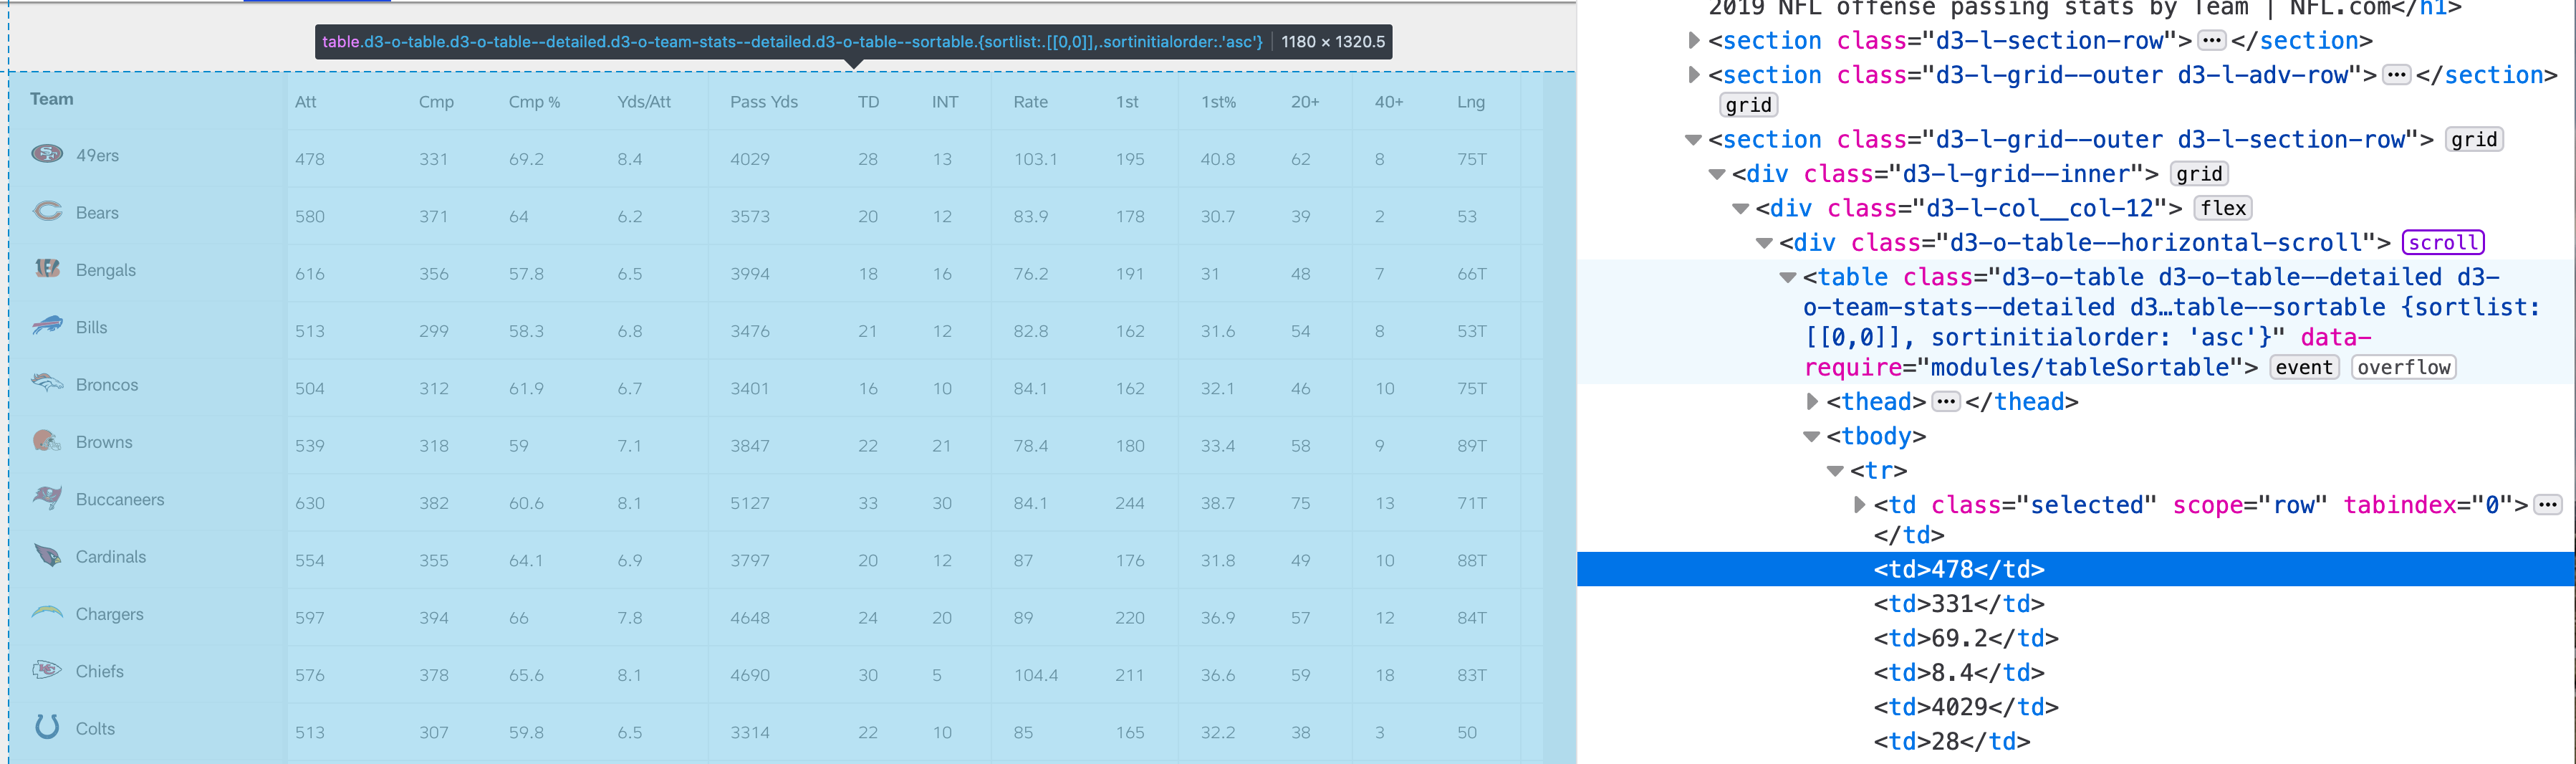


Here's how it operates on the 2023 team stats on the NFL website.

In [2]:
nfl = pd.read_html("https://www.nfl.com/stats/team-stats/offense/passing/2023/reg/all")
nfl

[                      Team  Att  Cmp  Cmp %  Yds/Att  Pass Yds  TD  INT  \
 0   Commanders  Commanders  636  407   64.0      6.6      4174  24   21   
 1           Chiefs  Chiefs  635  421   66.3      6.9      4383  28   17   
 2       Chargers  Chargers  632  409   64.7      6.8      4312  24    8   
 3         Vikings  Vikings  631  424   67.2      7.4      4700  30   19   
 4           Browns  Browns  624  355   56.9      6.4      4011  24   23   
 5         Jaguars  Jaguars  620  412   66.4      7.1      4377  22   14   
 6         Bengals  Bengals  615  420   68.3      6.9      4257  27   14   
 7         Cowboys  Cowboys  614  428   69.7      7.6      4660  36   10   
 8             Lions  Lions  606  408   67.3      7.6      4606  30   12   
 9           Saints  Saints  606  406   67.0      7.0      4225  28   11   
 10              Jets  Jets  601  356   59.2      5.6      3373  11   15   
 11          Texans  Texans  592  372   62.8      7.7      4578  27    8   
 12      Pan

We can access the elements of that list using square brackets.

In [3]:
teams_2023 = nfl[0]
teams_2023.head()

,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Commanders Commanders,636,407,64.0,6.6,4174,24,21,81.6,190,29.9,48,5,51T,65,449
1,Chiefs Chiefs,635,421,66.3,6.9,4383,28,17,89.6,216,34.0,52,8,67T,28,195
2,Chargers Chargers,632,409,64.7,6.8,4312,24,8,91.8,204,32.3,55,7,79,43,355
3,Vikings Vikings,631,424,67.2,7.4,4700,30,19,92.4,220,34.9,74,7,62T,47,341
4,Browns Browns,624,355,56.9,6.4,4011,24,23,73.7,173,27.7,53,15,75,45,318


### Using `read_html()` in a loop

Because the URL is structured very simply - the only thing that changes is the year in each URL - it would not be hard to write a loop that would gather several years for us at once.

In [22]:
for year in range(2019, 2024):
  print(year)

2019
2020
2021
2022
2023


In [6]:
for year in range(2019, 2024):
  url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
  print(url)

https://www.nfl.com/stats/team-stats/offense/passing/2019/reg/all
https://www.nfl.com/stats/team-stats/offense/passing/2020/reg/all
https://www.nfl.com/stats/team-stats/offense/passing/2021/reg/all
https://www.nfl.com/stats/team-stats/offense/passing/2022/reg/all
https://www.nfl.com/stats/team-stats/offense/passing/2023/reg/all


In [7]:
for year in range(2019, 2024):
  url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"

  # read_html returns a list of data frames
  stats = pd.read_html(url)

  # extract the main data frame from the list
  stats = stats[0]

  # add a year variable to the data frame
  stats["year"] = year
  print(stats.head())

                     Team  Att  Cmp  Cmp %  Yds/Att  Pass Yds  TD  INT  Rate  \
0        Falcons  Falcons  684  459   67.1      7.4      5049  29   15  93.8   
1      Panthers  Panthers  633  382   60.4      6.5      4134  17   21  74.7   
2              Rams  Rams  632  397   62.8      7.4      4669  22   17  85.6   
3  Buccaneers  Buccaneers  630  382   60.6      8.1      5127  33   30  84.1   
4      Patriots  Patriots  620  378   61.0      6.7      4153  25    9  88.2   

   1st  1st%  20+  40+  Lng  Sck  SckY  year  
0  258  37.7   52    5  93T   50   335  2019  
1  230  36.3   40    7  52T   58   484  2019  
2  222  35.1   73    6   66   22   170  2019  
3  244  38.7   75   13  71T   47   282  2019  
4  197  31.8   62    6   59   28   192  2019  
                 Team  Att  Cmp  Cmp %  Yds/Att  Pass Yds  TD  INT   Rate  \
0  Steelers  Steelers  656  428   65.2      6.3      4129  35   11   93.5   
1    Cowboys  Cowboys  639  413   64.6      7.1      4511  25   13   89.9   
2     

Let's do the same thing, but save the results to a list rather than printing them.

In [8]:
nfl = []
for year in range(2019, 2024):
  url = "https://www.nfl.com/stats/team-stats/offense/passing/" + str(year) + "/reg/all"
  stats = pd.read_html(url)
  stats = stats[0]
  stats["year"] = year
  nfl.append(stats)

nfl

[                      Team  Att  Cmp  Cmp %  Yds/Att  Pass Yds  TD  INT  \
 0         Falcons  Falcons  684  459   67.1      7.4      5049  29   15   
 1       Panthers  Panthers  633  382   60.4      6.5      4134  17   21   
 2               Rams  Rams  632  397   62.8      7.4      4669  22   17   
 3   Buccaneers  Buccaneers  630  382   60.6      8.1      5127  33   30   
 4       Patriots  Patriots  620  378   61.0      6.7      4153  25    9   
 5         Bengals  Bengals  616  356   57.8      6.5      3994  18   16   
 6       Dolphins  Dolphins  615  371   60.3      6.7      4117  22   18   
 7           Eagles  Eagles  613  391   63.8      6.6      4063  27    8   
 8           Giants  Giants  607  376   61.9      6.7      4070  30   17   
 9         Cowboys  Cowboys  597  388   65.0      8.2      4902  30   11   
 10      Chargers  Chargers  597  394   66.0      7.8      4648  24   20   
 11        Jaguars  Jaguars  589  364   61.8      6.8      4023  24    8   
 12         

We've got a list of data frames - if we'd like to combine them, we can do that with `pd.concat()`

In [9]:
nfl_combined = pd.concat(nfl, ignore_index=True)

nfl_combined

,Team,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,year
0,Falcons Falcons,684,459,67.1,7.4,5049,29,15,93.8,258,37.7,52,5,93T,50,335,2019
1,Panthers Panthers,633,382,60.4,6.5,4134,17,21,74.7,230,36.3,40,7,52T,58,484,2019
2,Rams Rams,632,397,62.8,7.4,4669,22,17,85.6,222,35.1,73,6,66,22,170,2019
3,Buccaneers Buccaneers,630,382,60.6,8.1,5127,33,30,84.1,244,38.7,75,13,71T,47,282,2019
4,Patriots Patriots,620,378,61.0,6.7,4153,25,9,88.2,197,31.8,62,6,59,28,192,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Broncos Broncos,513,337,65.7,7.0,3566,28,9,96.7,154,30.0,44,13,60,52,304,2023
156,Steelers Steelers,506,323,63.8,6.8,3421,13,9,84.6,153,30.2,41,9,86,36,258,2023
157,Ravens Ravens,494,328,66.4,7.9,3881,27,7,102.5,180,36.4,52,9,80T,41,246,2023
158,Titans Titans,494,304,61.5,7.1,3512,14,11,83.2,158,32.0,54,10,70,64,445,2023


From there, we could perform any cleanup and analyses we'd like!

## Using requests and Beautiful Soup

Not all pieces of information that we'd like will always be present in a `<table>` HTML element. Sometimes we'll want to construct our own datasets using data that might have some structure (thanks to HTML) but doesn't necessarily exist in a table yet.

This will happen in two steps:


1.   Download an HTML page using requests
2.   Parse the HTML using Beautiful Soup

We're going to be using [Books to Scrape](http://books.toscrape.com/index.html), a site that intentionally makes itself available to teach and test web scraping. Following along with some of [this helpful blog post](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5), we will look to scrape the following information about the books on this page:
- title
- price
- availability
- rating
- url

### Downloading a web page

The first step is to use requests to obtain the HTML for a page.

In [25]:
# Specify the URL we want to access
url = "http://books.toscrape.com/index.html"

# Download the HTML
page = requests.get(url)

# Check to see if it downloaded correctly by printing it as text
page.text

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" href

### Parsing the page

That seems like valid HTML, though it's a bit ugly. Let's parse this with Beautiful Soup and turn it into something a bit easier to read. We'll just print out the first few hundred characters so that it doesn't take over our screens.

In [26]:
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify()[:750])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->



### Understanding HTML

This is where an understanding of the structure of web pages and HTML will come in handy. Here are the bullet points you should absolutely know to move forward:
- HTML is a plaintext markup language that tells browsers how to render a web page
- HTML elements are created with tags like `<table></table>` or `<a></a>` or `<div></div>` that tell your browser how to display parts of a web page
- Tags usually have an open and close that tell you where content begins and ends, e.g. `<p>Paragraph content goes here</p>`
- Elements/tags can have aspects like classes (repeatable within a page, often used for styling), id (unique within a page), and named attributes (provide additional information about an element)
  - That might look like:
    - `<a class="my-class" href="https://google.com">Google!</a>`, where `href` is an attribute and `"my-class"` is a class for this hyperlink.
- Elements can be hierarchical, and some are even meant to be. Here is an example of a table and how it would render (`tr` is table row, `th` is table header, and `td` is table data)
  
```
<table>
    <tr>
        <th>
            Header one!
        </th>
        <th>
            Header two!
        </th>
        <th>
            Header three!
        </th>
    </tr>
    <tr>
        <td>
            Cell one!
        </td>
        <td>
            Cell two!
        </td>
        <td>
            Cell three!
        </td>
    </tr>
</table>
```

--------------

| Header one!   | Header two!   | Header three! |
| ------------- |:-------------:| -------------:|
| Cell one!     | Cell two!     | Cell three!   |


-------------

Most scrapers, including Beautiful Soup, can collect elements based on class, id, attributes, or type (`a`, `p`, `table`, etc.). The pandas `read_html()` function we used looks for `table` elements, for example.

You can see the underlying HTML of a web page in most modern browsers by right-clicking and choosing "View Source," "Inspect Element," or similar options.




### Extracting Page Elements

Notice that in the HTML we downloaded, the element containing information for each book is called `<article>`. We can use that to extract information from those elements.

We'll use the `find()` method to get the first `article` element.

In [27]:
print(soup.find("article").prettify())

<article class="product_pod">
 <div class="image_container">
  <a href="catalogue/a-light-in-the-attic_1000/index.html">
   <img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>
  </a>
 </div>
 <p class="star-rating Three">
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
  <i class="icon-star">
  </i>
 </p>
 <h3>
  <a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">
   A Light in the ...
  </a>
 </h3>
 <div class="product_price">
  <p class="price_color">
   Â£51.77
  </p>
  <p class="instock availability">
   <i class="icon-ok">
   </i>
   In stock
  </p>
  <form>
   <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">
    Add to basket
   </button>
  </form>
 </div>
</article>



Within that, we can see that there is information we're looking for. Let's think about how to extract it from one book, and then we can run something similar on each book on the page.

Let's start with the rating, which is a `p` element with a two classes: `star-rating` and `Three` (an element can have more than one class, and they are separated by spaces). We want to extract `Three`, but let's start by making sure we have the correct `p` element.

In [28]:
book = soup.find("article")

In [34]:
book.find("p", class_="star-rating")

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

That looks right! Let's use the `get()` method to retrieve the classes associated with that `p`.

In [35]:
book.find("p", class_="star-rating").get("class")

['star-rating', 'Three']

Great! Now let's get the rating, which is the `[1]` element of that list.

In [36]:
book.find("p", class_="star-rating").get("class")[1]

'Three'

We'll save that code for later and try to get a few more elements.

In [38]:
title = book.find("h3").find("a").get("title")
print("Title:", title)

rating = book.find("p", class_="star-rating").get("class")[1]
print("Rating:", rating)

# .text extracts the text from an element
# .strip() removes leading and trailing white space from a string
price = book.find("p", class_="price_color").text.strip()
print("Price:", price)

availability = book.find("p", class_="availability").text.strip()
print("Availability:", availability)

# We'll add the "http://books.toscrape.com/" before each url ourselves
url = book.find("h3").find("a").get("href")
print("URL before cleanup:", url)
url = "http://books.toscrape.com/" + url
print("URL after cleanup:", url)

Title: A Light in the Attic
Rating: Three
Price: Â£51.77
Availability: In stock
URL before cleanup: catalogue/a-light-in-the-attic_1000/index.html
URL after cleanup: http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html


### Looping Through Multiple Elements

We have the beginnings of a proper scraper there! Let's try looping over all of the books on this page using `findAll()` rather than `find()` for each article.

In [28]:
books = soup.find_all("article")

This gives us a list of matching elements that we can iterate over using a version of our previous code. Let's loop over that list and save the outputs to a bunch of lists.

In [29]:
titles = []
ratings = []
prices = []
availabilities = []
urls = []

for book in books:
  title = book.find("h3").find("a").get("title")
  titles.append(title)

  rating = book.find("p", class_="star-rating").get("class")[1]
  ratings.append(rating)

  price = book.find("p", class_="price_color").text.strip()
  prices.append(price)

  availability = book.find("p", class_="availability").text.strip()
  availabilities.append(availability)

  url = book.find("h3").find("a").get("href")
  url = "http://books.toscrape.com/" + url
  urls.append(url)

# Another way to do the above: more "pythonic" to use list comprehensions
# titles = [book.find("h3").find("a").get("title") for book in books]
# rating = [book.find("p", class_="star-rating").get("class")[1] for book in books]
# price = [book.find("p", class_="price_color").text.strip() for book in books]
# availability = [book.find("p", class_="availability").text.strip() for book in books]
# url = ["http://books.toscrape.com/" + book.find("h3").find("a").get("href") for book in books] 

print(titles)
print(ratings)
print(prices)
print(availabilities)
print(urls)

['A Light in the Attic', 'Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind', 'The Requiem Red', 'The Dirty Little Secrets of Getting Your Dream Job', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics', 'The Black Maria', 'Starving Hearts (Triangular Trade Trilogy, #1)', "Shakespeare's Sonnets", 'Set Me Free', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)", 'Rip it Up and Start Again', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991', 'Olio', 'Mesaerion: The Best Science Fiction Stories 1800-1849', 'Libertarianism for Beginners', "It's Only the Himalayas"]
['Three', 'One', 'One', 'Four', 'Five', 'One', 'Four', 'Three', 'Four', 'One', 'Two', 'Four', 'Five', 'Five', 'Five', 'Three', 'One', 'One', 'Two', 'Two']
['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', '

From there, we can easily turn those into a pandas data frame.

In [30]:
book_info = pd.DataFrame({
    "title": titles,
    "rating": ratings,
    "price": prices,
    "availability": availabilities,
    "url": urls
})

book_info

,title,rating,price,availability,url
0,A Light in the Attic,Three,Â£51.77,In stock,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,One,Â£53.74,In stock,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,One,Â£50.10,In stock,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,Four,Â£47.82,In stock,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,Five,Â£54.23,In stock,http://books.toscrape.com/catalogue/sapiens-a-...
5,The Requiem Red,One,Â£22.65,In stock,http://books.toscrape.com/catalogue/the-requie...
6,The Dirty Little Secrets of Getting Your Dream...,Four,Â£33.34,In stock,http://books.toscrape.com/catalogue/the-dirty-...
7,The Coming Woman: A Novel Based on the Life of...,Three,Â£17.93,In stock,http://books.toscrape.com/catalogue/the-coming...
8,The Boys in the Boat: Nine Americans and Their...,Four,Â£22.60,In stock,http://books.toscrape.com/catalogue/the-boys-i...
9,The Black Maria,One,Â£52.15,In stock,http://books.toscrape.com/catalogue/the-black-...


Let's combine those into a function we can use later.

In [31]:
def book_scraper(page_url):
  # Use requests to download the content
  page = requests.get(page_url)

  # Use BeautifulSoup to parse the HTML
  soup = BeautifulSoup(page.text, "html.parser")

  # Find all the books on the page
  books = soup.find_all("article")

  # Run our loop on each book like we did before
  titles = []
  ratings = []
  prices = []
  availabilities = []
  urls = []

  for book in books:
    title = book.find("h3").find("a").get("title")
    titles.append(title)

    rating = book.find("p", class_="star-rating").get("class")[1]
    ratings.append(rating)

    price = book.find("p", class_="price_color").text.strip()
    prices.append(price)

    availability = book.find("p", class_="availability").text.strip()
    availabilities.append(availability)

    url = book.find("h3").find("a").get("href")
    url = "http://books.toscrape.com/" + url
    urls.append(url)
      
  # as before, more pythonic to do list comprehensions, but maybe a bit harder to understand
  # titles = [book.find("h3").find("a").get("title") for book in books]
  # rating = [book.find("p", class_="star-rating").get("class")[1] for book in books]
  # price = [book.find("p", class_="price_color").text.strip() for book in books]
  # availability = [book.find("p", class_="availability").text.strip() for book in books]
  # url = ["http://books.toscrape.com/" + book.find("h3").find("a").get("href") for book in books] 

  book_info = pd.DataFrame({
    "title": titles,
    "rating": ratings,
    "price": prices,
    "availability": availabilities,
    "url": urls
  })

  return(book_info)



Now let's try running that on our main page to see how it works.

In [32]:
first_page = book_scraper("http://books.toscrape.com/index.html")

first_page

,title,rating,price,availability,url
0,A Light in the Attic,Three,Â£51.77,In stock,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,One,Â£53.74,In stock,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,One,Â£50.10,In stock,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,Four,Â£47.82,In stock,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,Five,Â£54.23,In stock,http://books.toscrape.com/catalogue/sapiens-a-...
5,The Requiem Red,One,Â£22.65,In stock,http://books.toscrape.com/catalogue/the-requie...
6,The Dirty Little Secrets of Getting Your Dream...,Four,Â£33.34,In stock,http://books.toscrape.com/catalogue/the-dirty-...
7,The Coming Woman: A Novel Based on the Life of...,Three,Â£17.93,In stock,http://books.toscrape.com/catalogue/the-coming...
8,The Boys in the Boat: Nine Americans and Their...,Four,Â£22.60,In stock,http://books.toscrape.com/catalogue/the-boys-i...
9,The Black Maria,One,Â£52.15,In stock,http://books.toscrape.com/catalogue/the-black-...


### Crawling an Entire Site

That gets us all of the books from the first page! If we want to go through the entire catalog, however, we need to perform this same operation on multiple pages. Fortunately for us, the URLs of each page here follow a similar pattern after the first page:
- `http://books.toscrape.com/catalogue/page-{PAGE-NUMBER}.html`

We also know that there are 50 pages by looking at the bottom to see "Page ___ of 50." We can use this to construct a list of all of the URLS for catalog pages, starting with the landing page.

In [24]:
catalog_urls = ["http://books.toscrape.com/index.html"]

for i in range(2, 51):
  new_url = "http://books.toscrape.com/catalogue/page-" + str(i) + ".html"
  catalog_urls.append(new_url)

catalog_urls

['http://books.toscrape.com/index.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html',
 'http://books.toscrape.com/catalogue/page-6.html',
 'http://books.toscrape.com/catalogue/page-7.html',
 'http://books.toscrape.com/catalogue/page-8.html',
 'http://books.toscrape.com/catalogue/page-9.html',
 'http://books.toscrape.com/catalogue/page-10.html',
 'http://books.toscrape.com/catalogue/page-11.html',
 'http://books.toscrape.com/catalogue/page-12.html',
 'http://books.toscrape.com/catalogue/page-13.html',
 'http://books.toscrape.com/catalogue/page-14.html',
 'http://books.toscrape.com/catalogue/page-15.html',
 'http://books.toscrape.com/catalogue/page-16.html',
 'http://books.toscrape.com/catalogue/page-17.html',
 'http://books.toscrape.com/catalogue/page-18.html',
 'http://books.toscrape.com/catalogue/page-19.html',
 'http://book

Thanks to the function we wrote before, we should be able to crawl through all of these pages to get information about all of the books. Let's try it!

In [25]:
# Let's make an empty list to hold our data frames
every_book = []

# Use our book_scraper function to scrape each page
for url in catalog_urls:
  print("Scraping page", url)
  tmp = book_scraper(url)
  every_book.append(tmp)

# another alternative to for loop above, but don't get status printouts
# every_book = [bookscraper(url) for url in catalog_urls]

# Inspect the first two to see if it worked
every_book[1:2]

Scraping page http://books.toscrape.com/index.html
Scraping page http://books.toscrape.com/catalogue/page-2.html
Scraping page http://books.toscrape.com/catalogue/page-3.html
Scraping page http://books.toscrape.com/catalogue/page-4.html
Scraping page http://books.toscrape.com/catalogue/page-5.html
Scraping page http://books.toscrape.com/catalogue/page-6.html
Scraping page http://books.toscrape.com/catalogue/page-7.html
Scraping page http://books.toscrape.com/catalogue/page-8.html
Scraping page http://books.toscrape.com/catalogue/page-9.html
Scraping page http://books.toscrape.com/catalogue/page-10.html
Scraping page http://books.toscrape.com/catalogue/page-11.html
Scraping page http://books.toscrape.com/catalogue/page-12.html
Scraping page http://books.toscrape.com/catalogue/page-13.html
Scraping page http://books.toscrape.com/catalogue/page-14.html
Scraping page http://books.toscrape.com/catalogue/page-15.html
Scraping page http://books.toscrape.com/catalogue/page-16.html
Scraping pag

[                                                title rating    price  \
 0                                         In Her Wake    One  Â£12.84   
 1                                     How Music Works    Two  Â£37.32   
 2   Foolproof Preserving: A Guide to Small Batch J...  Three  Â£30.52   
 3                          Chase Me (Paris Nights #2)   Five  Â£25.27   
 4                                          Black Dust   Five  Â£34.53   
 5                       Birdsong: A Story in Pictures  Three  Â£54.64   
 6   America's Cradle of Quarterbacks: Western Penn...  Three  Â£22.50   
 7                      Aladdin and His Wonderful Lamp  Three  Â£53.13   
 8   Worlds Elsewhere: Journeys Around Shakespeareâ...   Five  Â£40.30   
 9                                      Wall and Piece   Four  Â£44.18   
 10  The Four Agreements: A Practical Guide to Pers...   Five  Â£17.66   
 11  The Five Love Languages: How to Express Heartf...  Three  Â£31.05   
 12                                  T

### Combining Results

Ok, we've got a list of data frames! Let's combine those together!

In [26]:
df_final = pd.concat(every_book, ignore_index=True)

df_final

,title,rating,price,availability,url
0,A Light in the Attic,Three,Â£51.77,In stock,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,One,Â£53.74,In stock,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,One,Â£50.10,In stock,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,Four,Â£47.82,In stock,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,Five,Â£54.23,In stock,http://books.toscrape.com/catalogue/sapiens-a-...
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,One,Â£55.53,In stock,http://books.toscrape.com/alice-in-wonderland-...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Four,Â£57.06,In stock,http://books.toscrape.com/ajin-demi-human-volu...
997,A Spy's Devotion (The Regency Spies of London #1),Five,Â£16.97,In stock,http://books.toscrape.com/a-spys-devotion-the-...
998,1st to Die (Women's Murder Club #1),One,Â£53.98,In stock,http://books.toscrape.com/1st-to-die-womens-mu...


Now we have basic information about all 1000 books on that site!

If we want to learn more about them, we can also use the URLs we collected for each of the items to dig deeper.

## Other Resources

- [Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [More In-Depth Tutorial](https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5)
- [Discussion on the Legality/Ethics of Scraping](https://benbernardblog.com/web-scraping-and-crawling-are-perfectly-legal-right/)
